<a href="https://colab.research.google.com/github/Patryk-O/Konwulcyjne-sieci-neuronowe/blob/main/Sie%C4%87_neuronowa_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import keras
from google.colab import drive
from matplotlib import pyplot as plt
from keras.utils import image_dataset_from_directory
from keras import layers, Model
from keras.models import Sequential
from keras.utils import plot_model
from keras.metrics import CategoricalAccuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives,Accuracy
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

!unzip -q "/content/drive/MyDrive/sieci_neuronowe/zwierzetas.zip"

Mounted at /content/drive


In [ ]:

directory_test = '/content/zwierzetas/test/'
directory_train = '/content/zwierzetas/train/'

horses_train = os.path.join(directory_train, 'kon')
cats_train = os.path.join(directory_train, 'kot')
cows_train = os.path.join(directory_train, 'krowa')
chickens_train = os.path.join(directory_train, 'kurczak')
butterflies_train = os.path.join(directory_train, 'motyl')
sheeps_train = os.path.join(directory_train, 'owca')
spiders_train = os.path.join(directory_train, 'pajak')
dogs_train = os.path.join(directory_train, 'pies')
elephants_train = os.path.join(directory_train, 'slon')
squirrels_train = os.path.join(directory_train, 'wiewiorka')

horses_test = os.path.join(directory_test, 'kon')
cats_test = os.path.join(directory_test, 'kot')
cows_test = os.path.join(directory_test, 'krowa')
chickens_test = os.path.join(directory_test, 'kurczak')
butterflies_test = os.path.join(directory_test, 'motyl')
sheeps_test = os.path.join(directory_test, 'owca')
spiders_test = os.path.join(directory_test, 'pajak')
dogs_test = os.path.join(directory_test, 'pies')
elephants_test = os.path.join(directory_test, 'slon')
squirrels_test = os.path.join(directory_test, 'wiewiorka')

print('Zbiór uczący')
print(f'Liczba zdjęć kon {len(os.listdir(horses_train))}')
print(f'Liczba zdjęć kot {len(os.listdir(cats_train))}')
print(f'Liczba zdjęć krowa {len(os.listdir(cows_train))}')
print(f'Liczba zdjęć kurczak {len(os.listdir(chickens_train))}')
print(f'Liczba zdjęć motyl {len(os.listdir(butterflies_train))}')
print(f'Liczba zdjęć owca {len(os.listdir(sheeps_train))}')
print(f'Liczba zdjęć pajak {len(os.listdir(spiders_train))}')
print(f'Liczba zdjęć pies {len(os.listdir(dogs_train))}')
print(f'Liczba zdjęć slon {len(os.listdir(elephants_train))}')
print(f'Liczba zdjęć wiewiorka {len(os.listdir(squirrels_test))}')


print('Zbiór testowy')
print(f'Liczba zdjęć kota {len(os.listdir(horses_test))}')
print(f'Liczba zdjęć psa {len(os.listdir(cats_test))}')
print(f'Liczba zdjęć kota {len(os.listdir(cows_test))}')
print(f'Liczba zdjęć psa {len(os.listdir(chickens_test))}')
print(f'Liczba zdjęć kota {len(os.listdir(butterflies_test))}')
print(f'Liczba zdjęć psa {len(os.listdir(sheeps_test))}')
print(f'Liczba zdjęć kota {len(os.listdir(spiders_test))}')
print(f'Liczba zdjęć psa {len(os.listdir(dogs_test))}')
print(f'Liczba zdjęć kota {len(os.listdir(elephants_test))}')
print(f'Liczba zdjęć kota {len(os.listdir(squirrels_test))}')




Zbiór uczący
Liczba zdjęć kon 300
Liczba zdjęć kot 300
Liczba zdjęć krowa 300
Liczba zdjęć kurczak 300
Liczba zdjęć motyl 300
Liczba zdjęć owca 300
Liczba zdjęć pajak 300
Liczba zdjęć pies 300
Liczba zdjęć slon 300
Liczba zdjęć wiewiorka 100
Zbiór testowy
Liczba zdjęć kota 100
Liczba zdjęć psa 100
Liczba zdjęć kota 100
Liczba zdjęć psa 100
Liczba zdjęć kota 100
Liczba zdjęć psa 100
Liczba zdjęć kota 100
Liczba zdjęć psa 100
Liczba zdjęć kota 100
Liczba zdjęć kota 100


In [ ]:
train_dataset, valid_dataset = image_dataset_from_directory(directory_train, validation_split=0.2,
                                       subset='both',
                                       seed=1410,
                                       image_size=(256, 256),
                                       label_mode='categorical',
                                      color_mode="rgb"
                                       )

test_dataset = image_dataset_from_directory(directory_test, seed=1410,
                                       image_size=(256, 256),
                                       label_mode='categorical',
                                      color_mode="rgb"
                                       )


Found 3000 files belonging to 10 classes.
Using 2400 files for training.
Using 600 files for validation.
Found 1000 files belonging to 10 classes.


In [ ]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

['kon', 'kot', 'krowa', 'kurczak', 'motyl', 'owca', 'pajak', 'pies', 'slon', 'wiewiorka']


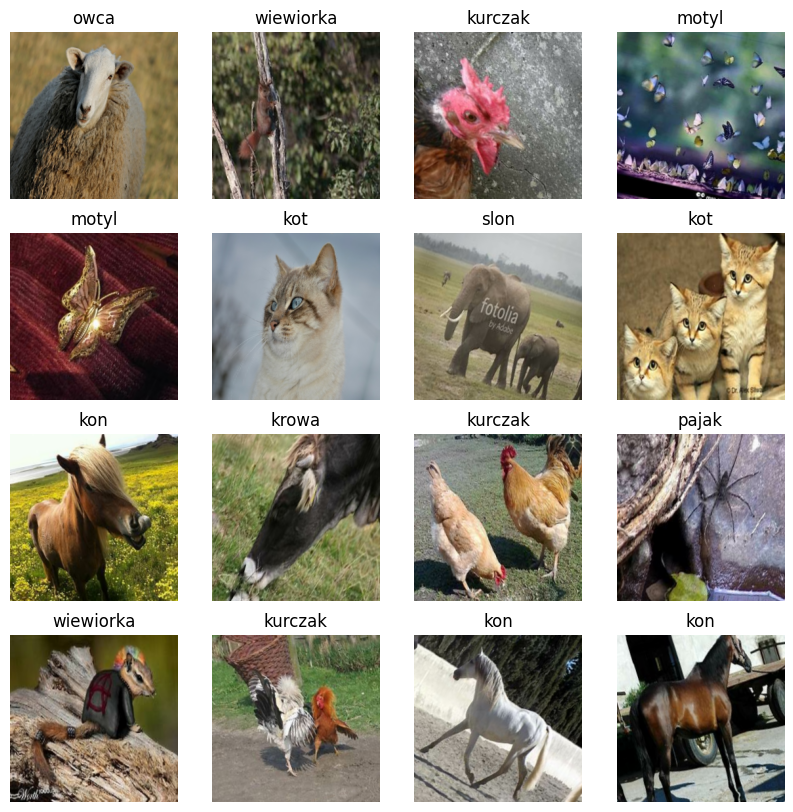

In [ ]:
class_names = train_dataset.class_names
print(class_names)

%matplotlib inline
fig, ax = plt.subplots(4,4, figsize=(10,10))


for images, labels in train_dataset.take(1):
    for i in range(16):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(4,4,i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.title(class_names[int(np.argmax(labels[i]))])
        plt.axis("off")


In [ ]:
train_dataset = train_dataset.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_dataset = train_dataset.prefetch(tf_data.AUTOTUNE)
valid_dataset = valid_dataset.prefetch(tf_data.AUTOTUNE)

In [ ]:
Smodel = Sequential([
    layers.Rescaling(1.0 / 255, input_shape=(256, 256, 3)),

    layers.Conv2D(32,(5,5), padding='same', activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3), padding='same', activation="relu"),
    layers.MaxPooling2D((2,2), strides=(2,2)),

    layers.Conv2D(96,(3,3), padding='same', activation="relu"),
    layers.MaxPooling2D((2,2), strides=(2,2)),

    layers.Conv2D(96,(3,3), padding='same', activation="relu"),
    layers.MaxPooling2D((2,2), strides=(2,2)),

    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
    ])

plot_model(model, show_shapes=True)


NameError: ignored

In [ ]:
# Kompilacja
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

# Uczenie sieciSS
history = model.fit(train_dataset, epochs=100, validation_data=valid_dataset,
                    batch_size=32)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

1 rozwiazanie bez wiekszych zmian uczenie:![image.png](
  
dokładność 28.30%

druga spróba przy zwiekszeniu ilosci danych przy pomocy data augmentation  32.1% przy 30 epokach ![image.png](
  
)

Przy zmianie modelu przy 30 epokach 75 proc

In [ ]:
result = model.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(result["accuracy"]*100,2)}%')

In [ ]:
y_pred = model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_true = np.argmax(y_true, axis=1)  # Przekształcenie na etykiety klas.

In [ ]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, f1_score

# Załóżmy, że y_true to prawdziwe etykiety, a y_pred to przewidziane etykiety
confusion_matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)
bac = balanced_accuracy_score(y_true, y_pred)
print(bac)
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')
f1_micro = f1_score(y_true, y_pred, average='micro')

print(f'F1 Score (Macro): {f1_macro}')
print(f'F1 Score (Weighted): {f1_weighted}')
print(f'F1 Score (Micro): {f1_micro}')

